In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
print(tf.__version__)

2.7.0


In [4]:
mnist = keras.datasets.fashion_mnist

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [6]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [7]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
class_names = ['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

Data Exploration

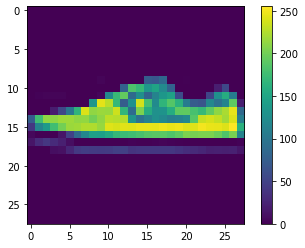

In [10]:
plt.figure()
plt.imshow(x_train[29293])
plt.colorbar()

In [11]:
x_train = x_train/255
x_test = x_test/255

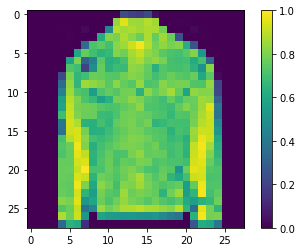

In [13]:
plt.figure()
plt.imshow(x_train[29])
plt.colorbar()

## Building the model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [99]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(326,activation = 'relu'))
model.add(Dense(56,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [100]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_47 (Dense)            (None, 326)               255910    
                                                                 
 dense_48 (Dense)            (None, 56)                18312     
                                                                 
 dense_49 (Dense)            (None, 10)                570       
                                                                 
Total params: 274,792
Trainable params: 274,792
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [102]:
model.fit(x_train, y_train, epochs = 30, batch_size = 5000)

Epoch 1/30
12/12 [==============================] - 1s 47ms/step - loss: 1.4182 - accuracy: 0.5611
Epoch 2/30
12/12 [==============================] - 1s 43ms/step - loss: 0.7074 - accuracy: 0.7534
Epoch 3/30
12/12 [==============================] - 1s 44ms/step - loss: 0.5651 - accuracy: 0.8074
Epoch 4/30
12/12 [==============================] - 1s 43ms/step - loss: 0.4991 - accuracy: 0.8293
Epoch 5/30
12/12 [==============================] - 0s 35ms/step - loss: 0.4607 - accuracy: 0.8411
Epoch 6/30
12/12 [==============================] - 0s 36ms/step - loss: 0.4389 - accuracy: 0.8483
Epoch 7/30
12/12 [==============================] - 0s 33ms/step - loss: 0.4193 - accuracy: 0.8552
Epoch 8/30
12/12 [==============================] - 0s 34ms/step - loss: 0.4023 - accuracy: 0.8606
Epoch 9/30
12/12 [==============================] - 0s 33ms/step - loss: 0.3972 - accuracy: 0.8619
Epoch 10/30
12/12 [==============================] - 0s 33ms/step - loss: 0.3909 - accuracy: 0.8626
Epoch 11/

In [103]:
model.evaluate(x_test,y_test,batch_size=5000)

2/2 [==============================] - 0s 41ms/step - loss: 0.3431 - accuracy: 0.8765


[0.343060165643692, 0.8765000104904175]

In [104]:
predicted_y = model.predict(x_test)

In [105]:
predicted_y

array([[1.00245470e-05, 2.71019218e-07, 3.82164671e-06, ...,
        3.99928614e-02, 2.62902514e-03, 9.29985225e-01],
       [1.37652314e-04, 4.74152362e-09, 9.94509518e-01, ...,
        9.71450893e-13, 2.21694245e-06, 3.89100983e-14],
       [2.26419670e-05, 9.99962687e-01, 5.99788393e-07, ...,
        1.36055911e-09, 5.13877808e-07, 1.26919317e-11],
       ...,
       [9.47874156e-04, 6.82236987e-07, 4.45774989e-03, ...,
        4.65994981e-06, 9.92735267e-01, 1.94805949e-09],
       [4.56900398e-06, 9.99705970e-01, 2.11691417e-06, ...,
        1.15190204e-07, 1.11671477e-06, 1.05335559e-07],
       [7.06051011e-04, 3.22171309e-06, 1.31260109e-04, ...,
        2.21754443e-02, 7.75605091e-04, 7.85250377e-05]], dtype=float32)

In [106]:
yy = model.predict_on_batch(x_test)

In [107]:
yy

array([[1.00245452e-05, 2.71019701e-07, 3.82164626e-06, ...,
        3.99928987e-02, 2.62902630e-03, 9.29985106e-01],
       [1.37651659e-04, 4.74151474e-09, 9.94509518e-01, ...,
        9.71447315e-13, 2.21693836e-06, 3.89100983e-14],
       [2.26419452e-05, 9.99962687e-01, 5.99787256e-07, ...,
        1.36055911e-09, 5.13877296e-07, 1.26919074e-11],
       ...,
       [9.47875960e-04, 6.82237612e-07, 4.45775222e-03, ...,
        4.65995890e-06, 9.92735267e-01, 1.94806682e-09],
       [4.56900807e-06, 9.99705970e-01, 2.11691622e-06, ...,
        1.15190424e-07, 1.11671579e-06, 1.05335758e-07],
       [7.06052582e-04, 3.22171854e-06, 1.31260342e-04, ...,
        2.21754834e-02, 7.75607186e-04, 7.85252414e-05]], dtype=float32)

In [132]:
yy[0]

array([1.0024545e-05, 2.7101970e-07, 3.8216463e-06, 2.9456362e-05,
       1.3446248e-06, 2.7318066e-02, 2.9963609e-05, 3.9992899e-02,
       2.6290263e-03, 9.2998511e-01], dtype=float32)